In [166]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import utils
import datasets as data
import constants
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
# options
%matplotlib inline
plt.style.use("seaborn")
mpl.rcParams["figure.dpi"] = 110
warnings.filterwarnings("ignore")


In [89]:
features = utils.one_hot_encode_cell_types(data.df_wt)
coords = data.df_wt[["x", "y"]].to_numpy()
obs = pd.DataFrame(pd.Series(data.df_wt["cell_type"].map(lambda x: constants.CELL_TYPES[x -1]), dtype="category"))
adata = AnnData(
    X=features,
    obsm={"spatial": coords},
    obs=obs
)

features = utils.one_hot_encode_cell_types(data.df_sick)
coords = data.df_sick[["x", "y"]].to_numpy()
obs = pd.DataFrame(pd.Series(data.df_sick["cell_type"].map(lambda x: constants.CELL_TYPES[x -1]), dtype="category"))

adata_sick = AnnData(
    X=features,
    obsm={"spatial": coords},
    obs=obs
)



In [ ]:
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)
# sc.tl.leiden(adata)

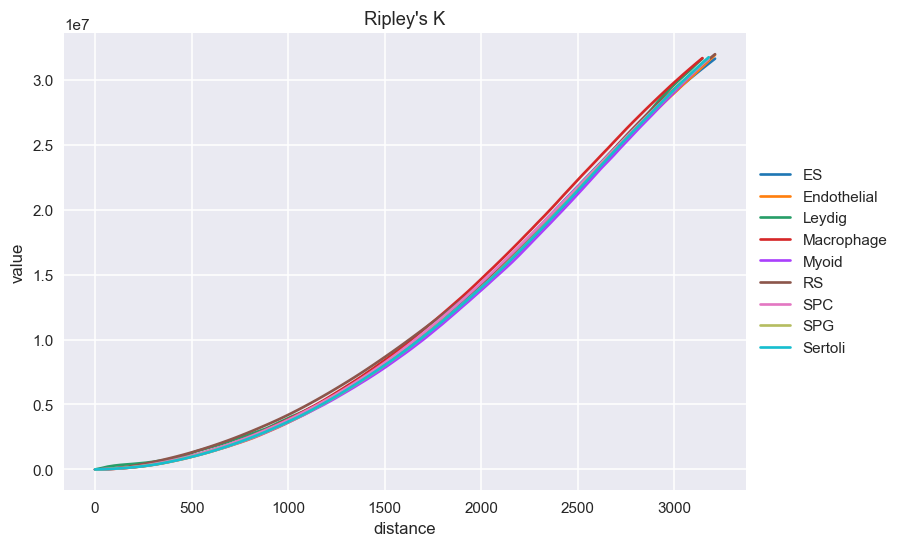

In [189]:
# sq.gr.ripley_k(adata, cluster_key="cell_type")
sq.pl.ripley_k(adata, cluster_key="cell_type")

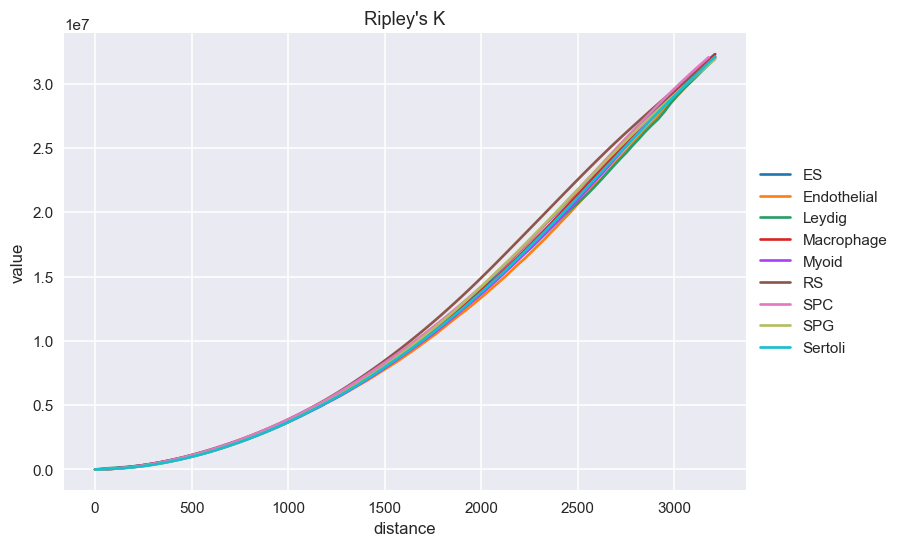

In [190]:
sq.gr.ripley_k(adata_sick, cluster_key="cell_type")
sq.pl.ripley_k(adata_sick, cluster_key="cell_type")


Co-occurrence WT

In [268]:
sq.gr.co_occurrence(adata, cluster_key="cell_type", n_splits=25, n_steps=100)

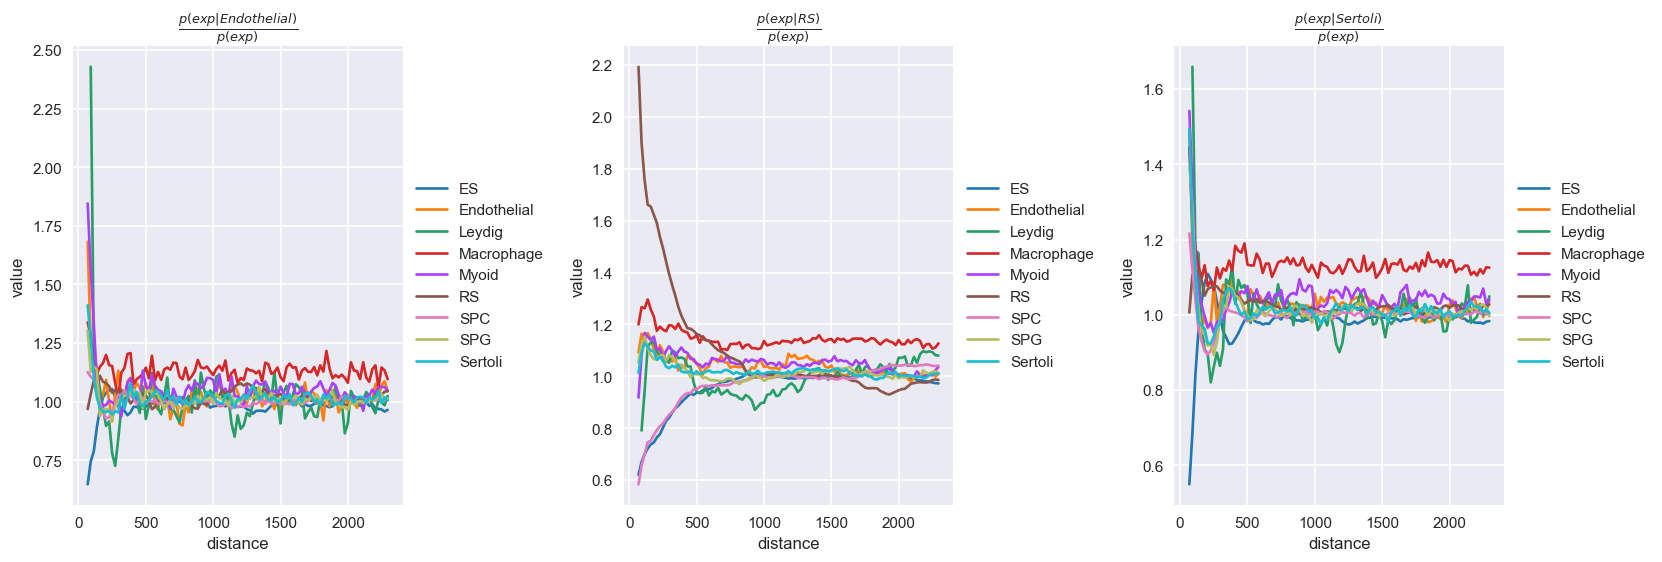

In [269]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["RS", "Endothelial", "Sertoli"])

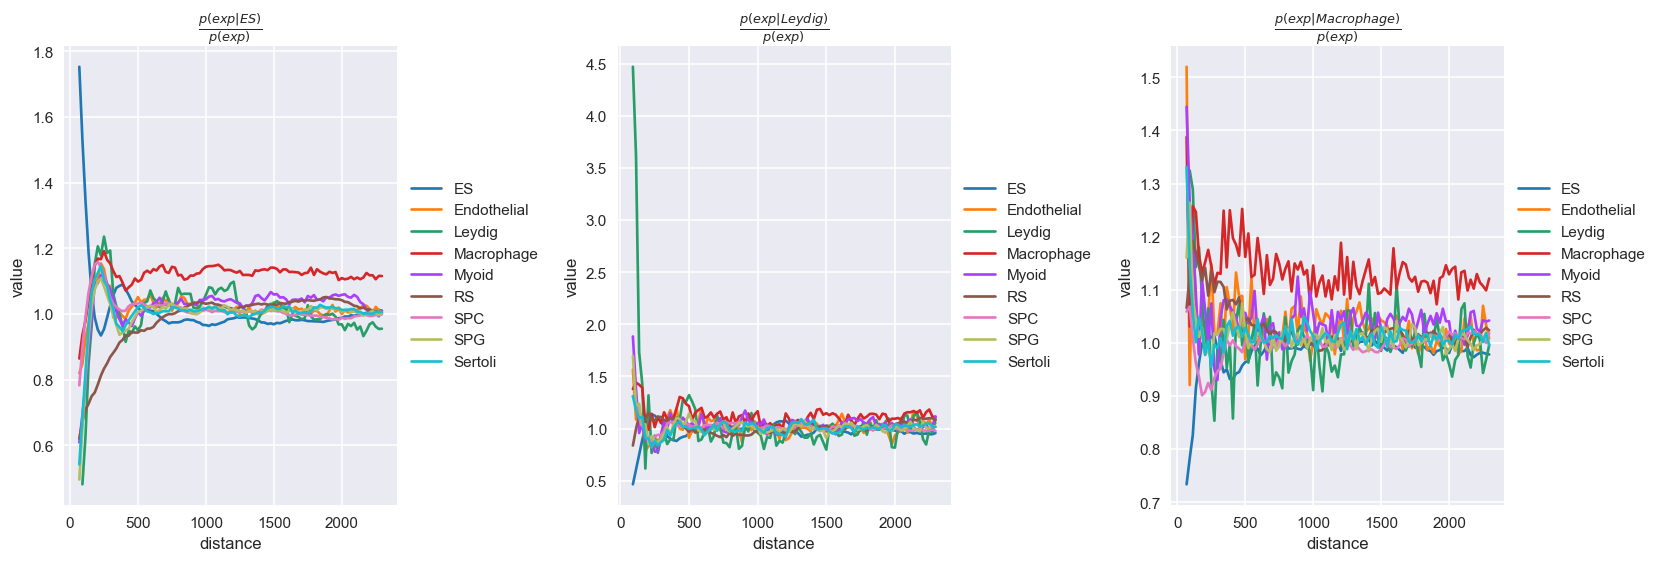

In [270]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["ES", "Leydig", "Macrophage"])

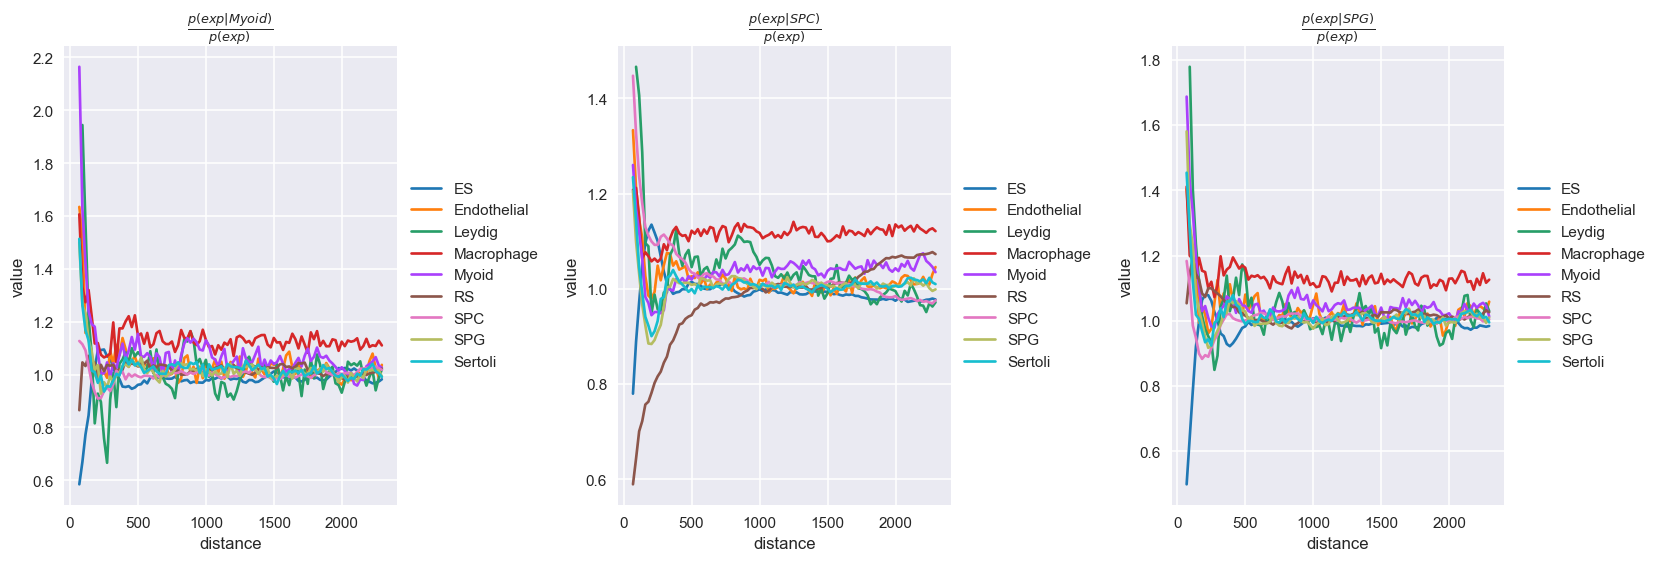

In [271]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["Myoid", "SPC", "SPG"])

Co-occurrence Diseased

In [272]:
sq.gr.co_occurrence(adata_sick, cluster_key="cell_type", n_splits=25, n_steps=100)

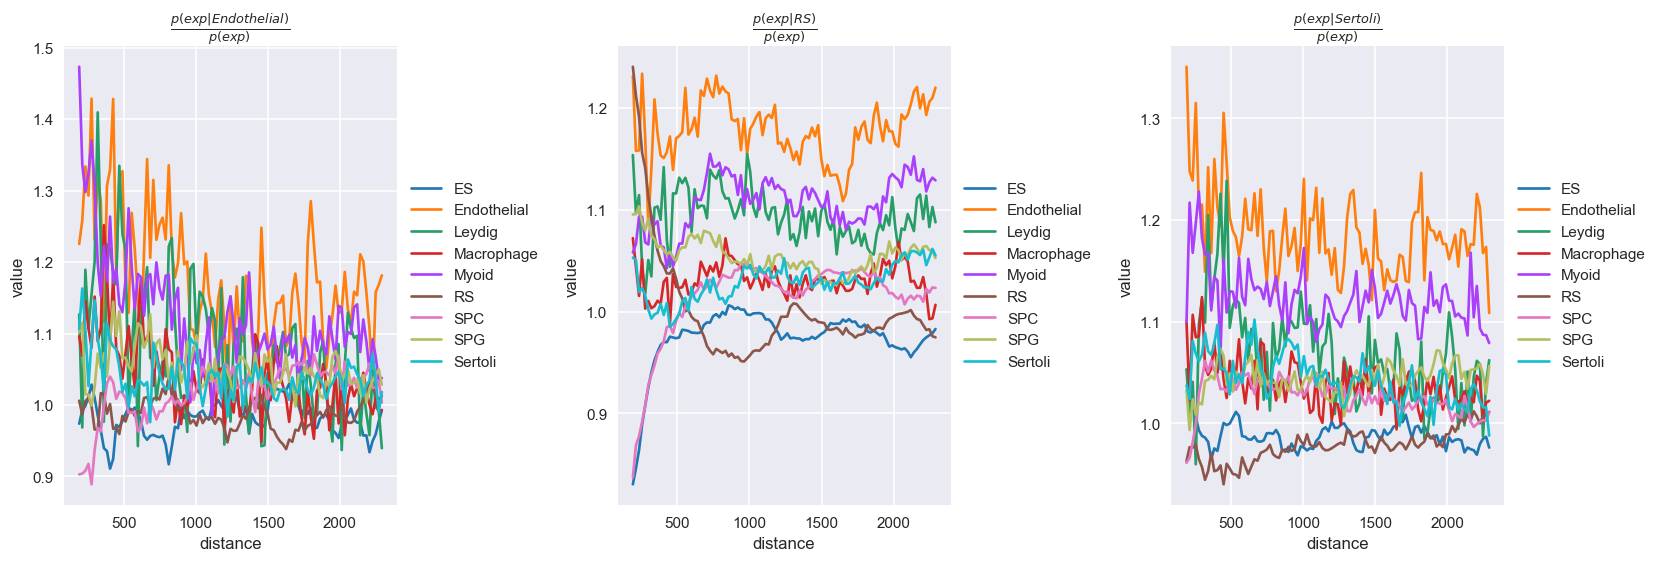

In [273]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["RS", "Endothelial", "Sertoli"])

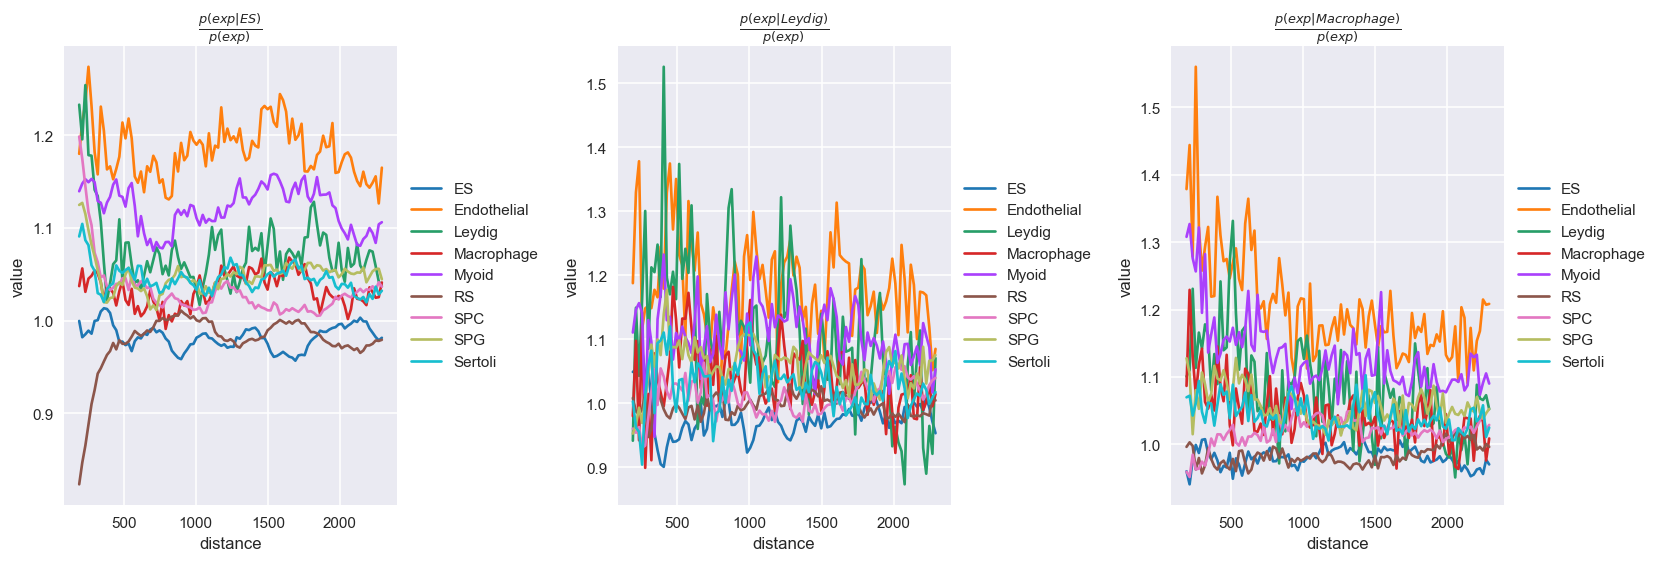

In [274]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["ES", "Leydig", "Macrophage"])

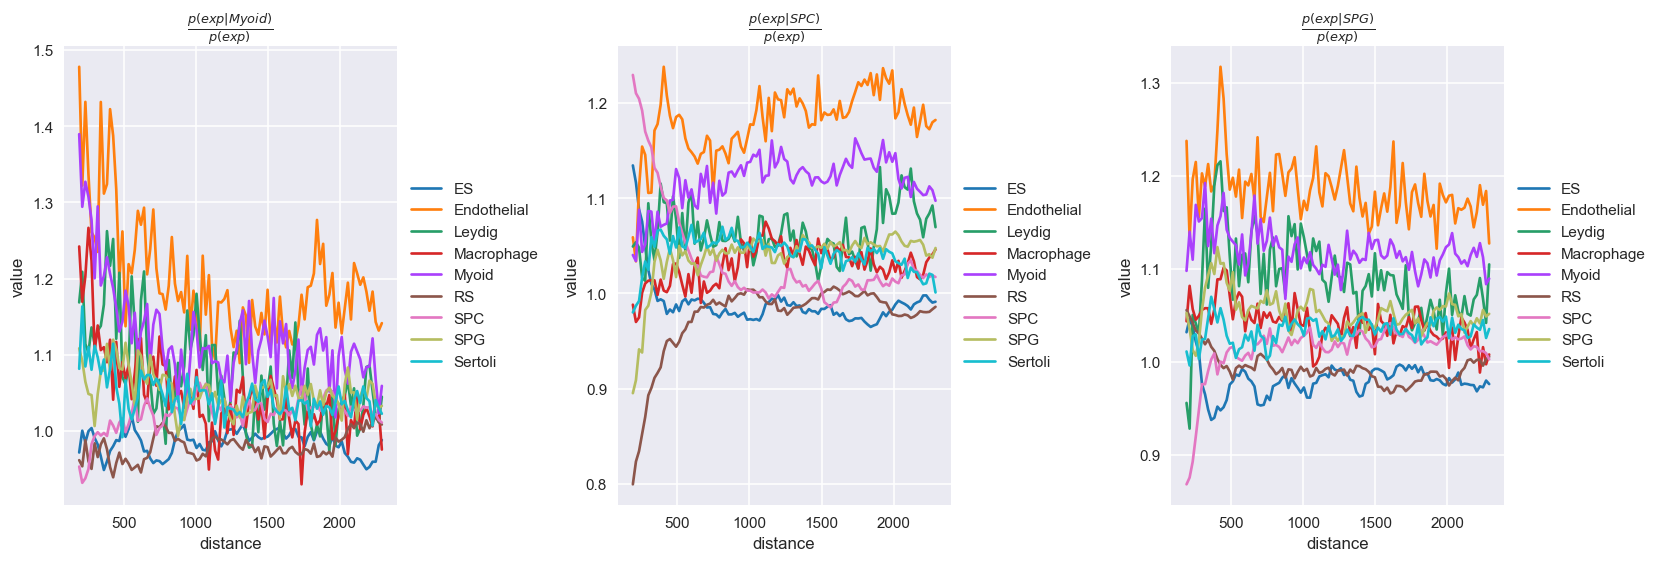

In [275]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["Myoid", "SPC", "SPG"])

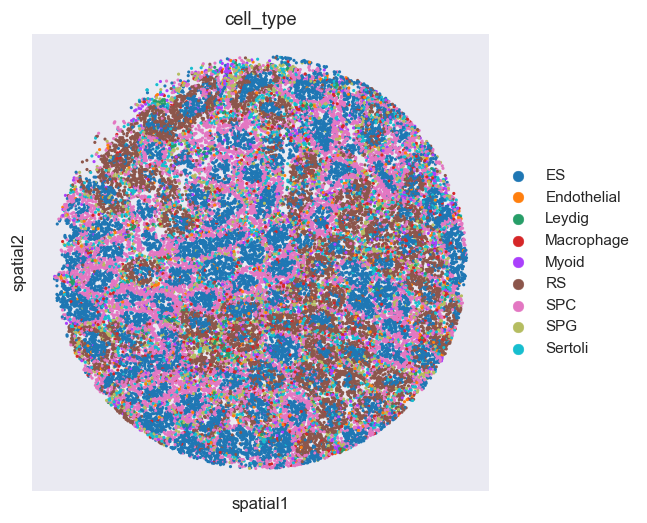

In [209]:
sc.pl.spatial(adata, color="cell_type", spot_size=35)


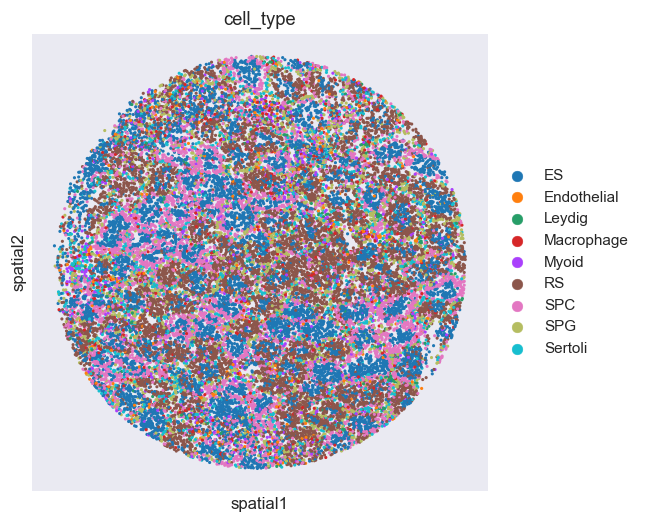

In [210]:
sc.pl.spatial(adata_sick, color="cell_type", spot_size=35)

In [278]:
new_co_oc = {
    "occ": adata.uns["cell_type_co_occurrence"]["occ"][:,:,:20],
    "interval": adata.uns["cell_type_co_occurrence"]["interval"][:21]
}
adata.uns["cell_type_co_occurrence"] = new_co_oc

new_co_oc = {
    "occ": adata_sick.uns["cell_type_co_occurrence"]["occ"][:,:,:20],
    "interval": adata_sick.uns["cell_type_co_occurrence"]["interval"][:21]
}
adata_sick.uns["cell_type_co_occurrence"] = new_co_oc

Co-occurrence WT


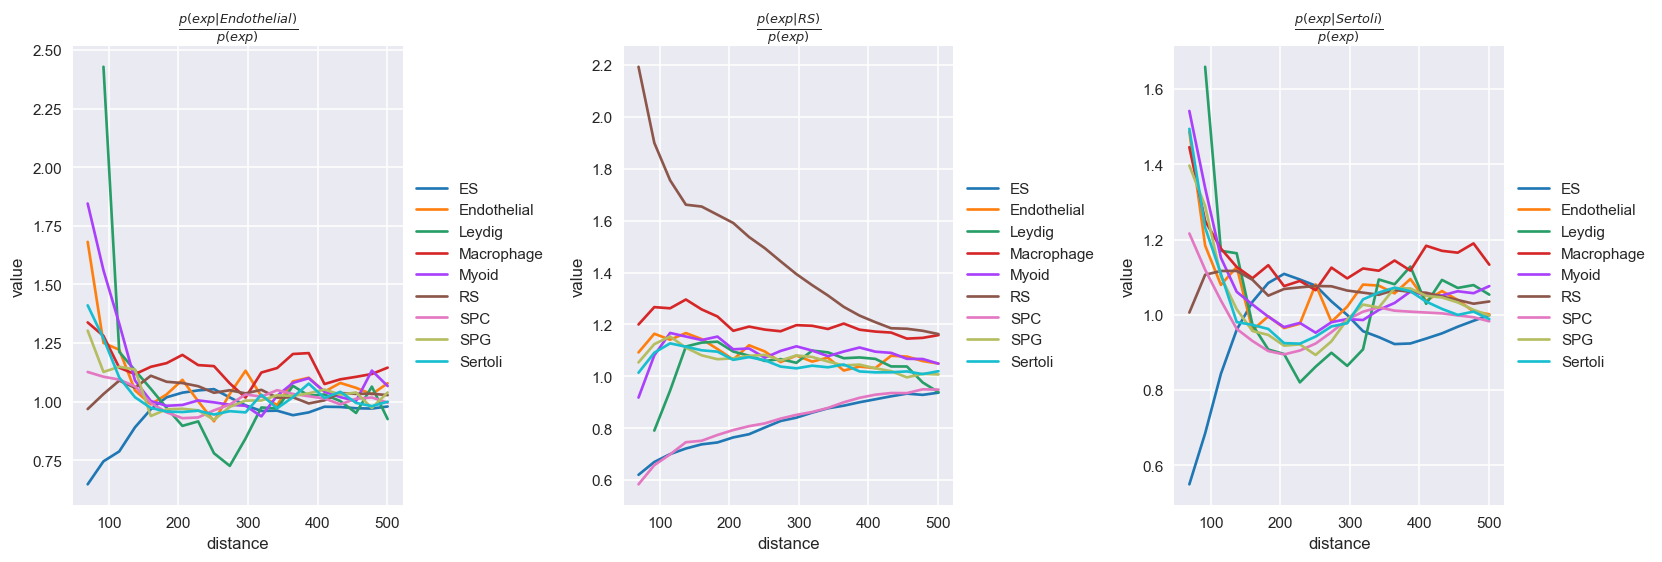

In [280]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["RS", "Endothelial", "Sertoli"])

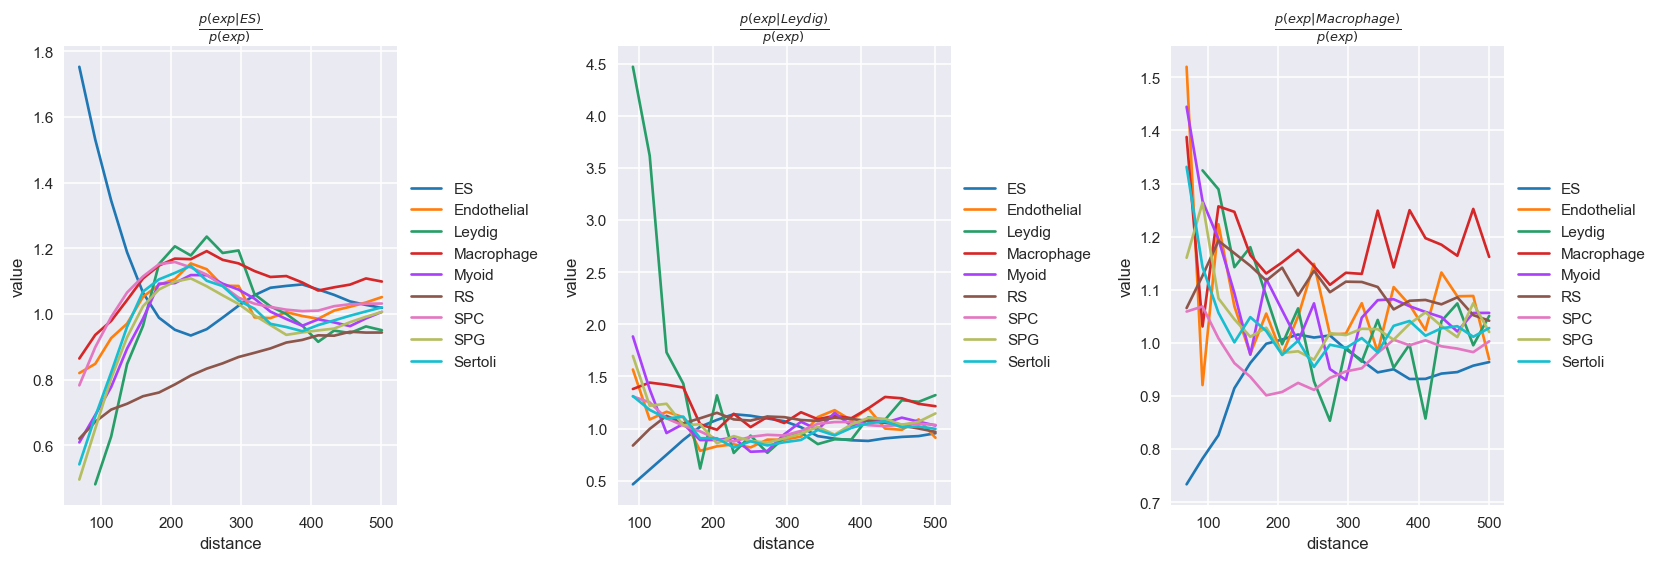

In [281]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["ES", "Leydig", "Macrophage"])

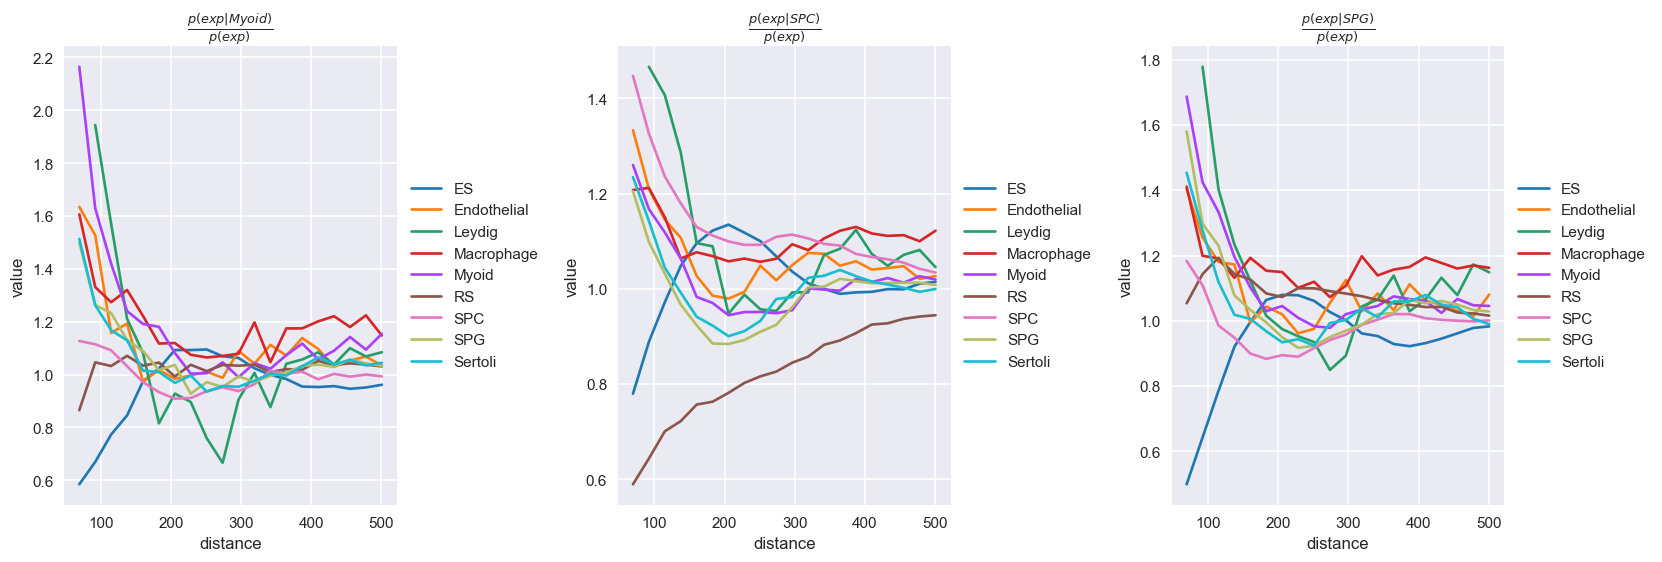

In [282]:
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["Myoid", "SPC", "SPG"])

Co-occurrence Diseased

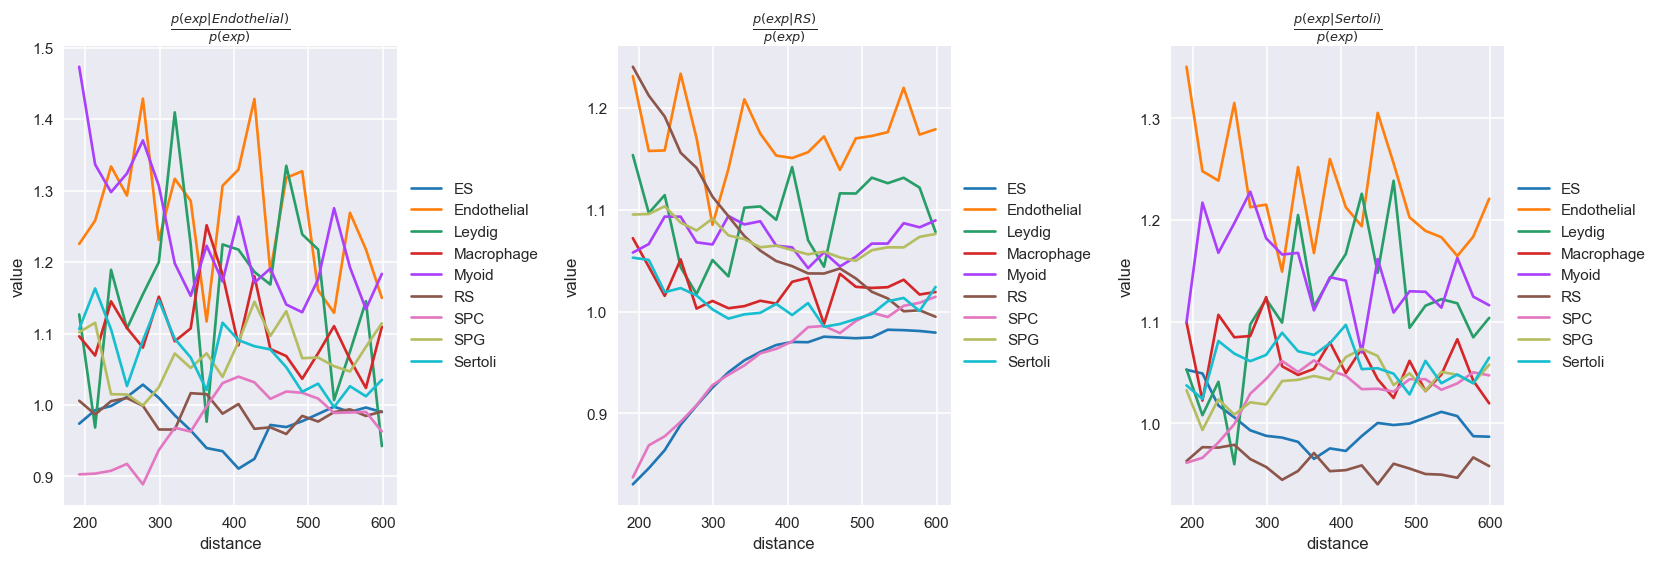

In [283]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["RS", "Endothelial", "Sertoli"])

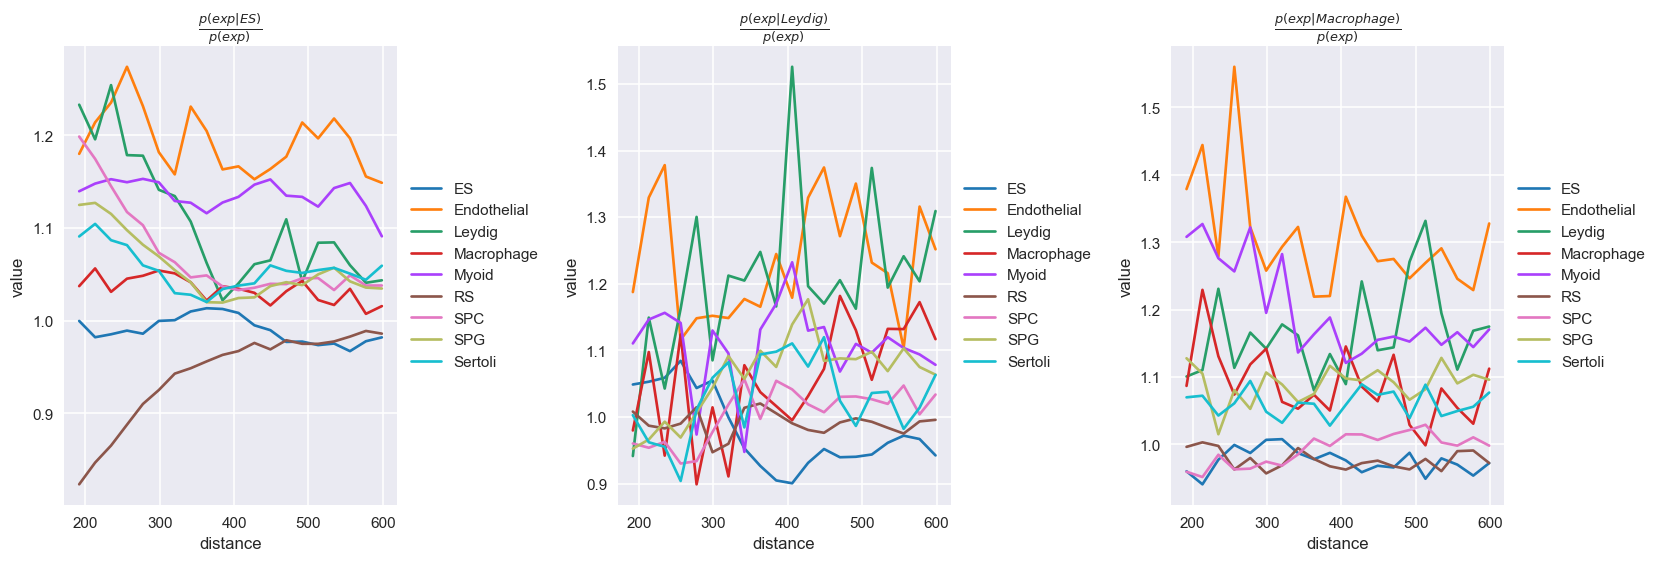

In [284]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["ES", "Leydig", "Macrophage"])

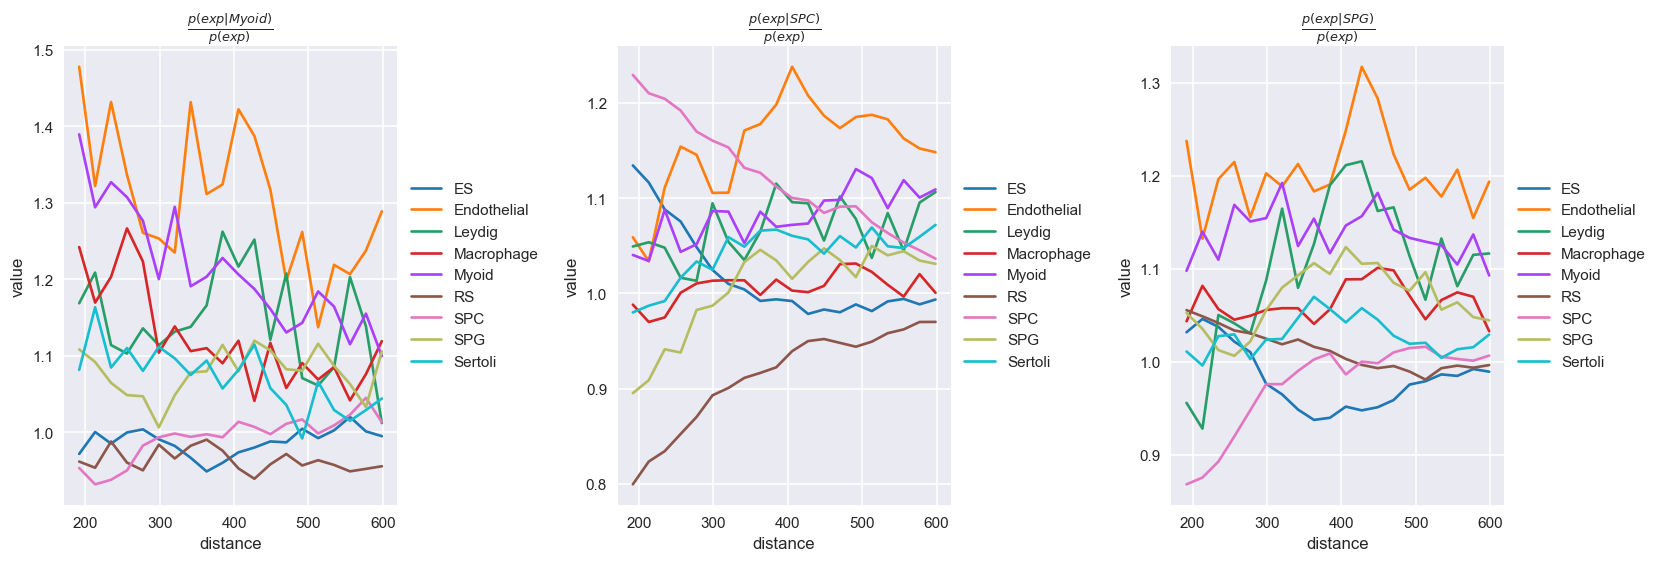

In [285]:
sq.pl.co_occurrence(adata_sick, cluster_key="cell_type", clusters=["Myoid", "SPC", "SPG"])
